# Import library and import data

In [64]:
import chess
import chess.pgn as pgn
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os

# ETL data
**Caution: If the directory "./piece-analysis.csv" existed and had data, you can pass this part.**


This part is used to extract, transform and load data from the raw chess game data in order to create a new dataset

In [65]:
players = ['Caruana', 'Polgar', 'Fischer', 'Morphy', 'Botvinnik', 'Tal',
 'Kasparov', 'Anand', 'Carlsen', 'Nakamura', 'Alekhine', 'Capablanca']

In [71]:
chess_pieces = ['P', 'R', 'N', 'B', 'Q', 'p', 'r', 'n', 'b', 'q']

piece_map = {'P': [0] * 400, 'N': [0] * 400, 'B': [0] * 400, 'R': [0] * 400, 'Q': [0] * 400, 
    'p': [0] * 400, 'n': [0] * 400, 'b': [0] * 400, 'r': [0] * 400, 'q': [0] * 400}

end_game_turn = [0] * 400 

for player in players:
  gameList = os.listdir('../raw_game/' + player)
  for game in gameList:
    gameLink = '../raw_game/' + player + '/' + game
    
    pgn = open(gameLink)

    first_game = chess.pgn.read_game(pgn)
    board = first_game.board()
    

    for turn, move in enumerate(first_game.mainline_moves()):
      board.push(move)
      board_str = str(board)
      for piece in board_str:
        if piece not in [' ', 'K', 'k', '\n', '.']:
          piece_map[piece][turn] += 1
    
    end_game_turn[turn] += 1

In [72]:
# Change piece data to dataframe
piece_data = pd.DataFrame(piece_map)

# Drop zeros rows (the row with all values is zero)
piece_data = piece_data[(piece_data.T != 0).any()]

# Add a turn column to the first column
piece_data.insert(loc=0, column = 'Turn', value = range(1, len(piece_data) + 1))

# Save dataframe to csv file
piece_data.to_csv('piece-analysis.csv', index=False)

In [73]:
piece_data

,Turn,P,N,B,R,Q,p,n,b,r,q
0,1,171136,42784,42784,42784,21392,171136,42784,42784,42784,21392
1,2,171136,42784,42784,42784,21392,171136,42784,42784,42784,21392
2,3,171136,42784,42784,42784,21392,171005,42784,42784,42784,21392
3,4,170671,42784,42784,42784,21392,171005,42784,42784,42784,21392
4,5,170671,42784,42784,42784,21392,170262,42759,42784,42784,21392
...,...,...,...,...,...,...,...,...,...,...,...
358,359,0,0,0,1,0,0,1,0,0,0
359,360,0,0,0,1,0,0,1,0,0,0
360,361,0,0,0,1,0,0,1,0,0,0
361,362,0,0,0,1,0,0,1,0,0,0


# Visualize your data to make analysis

In [3]:
piece_data = pd.read_csv("piece-analysis.csv")

In [4]:
# There are 21392 valid game in this dataset so we div
piece_data.iloc[:, 1:11] = piece_data.iloc[:, 1:11].div(21392)

In [5]:
piece_data

,Turn,P,N,B,R,Q,p,n,b,r,q
0,1,8.000000,2.0,2.0,2.000000,1.0,8.000000,2.000000,2.0,2.0,1.0
1,2,8.000000,2.0,2.0,2.000000,1.0,8.000000,2.000000,2.0,2.0,1.0
2,3,8.000000,2.0,2.0,2.000000,1.0,7.993876,2.000000,2.0,2.0,1.0
3,4,7.978263,2.0,2.0,2.000000,1.0,7.993876,2.000000,2.0,2.0,1.0
4,5,7.978263,2.0,2.0,2.000000,1.0,7.959144,1.998831,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
358,359,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0
359,360,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0
360,361,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0
361,362,0.000000,0.0,0.0,0.000047,0.0,0.000000,0.000047,0.0,0.0,0.0


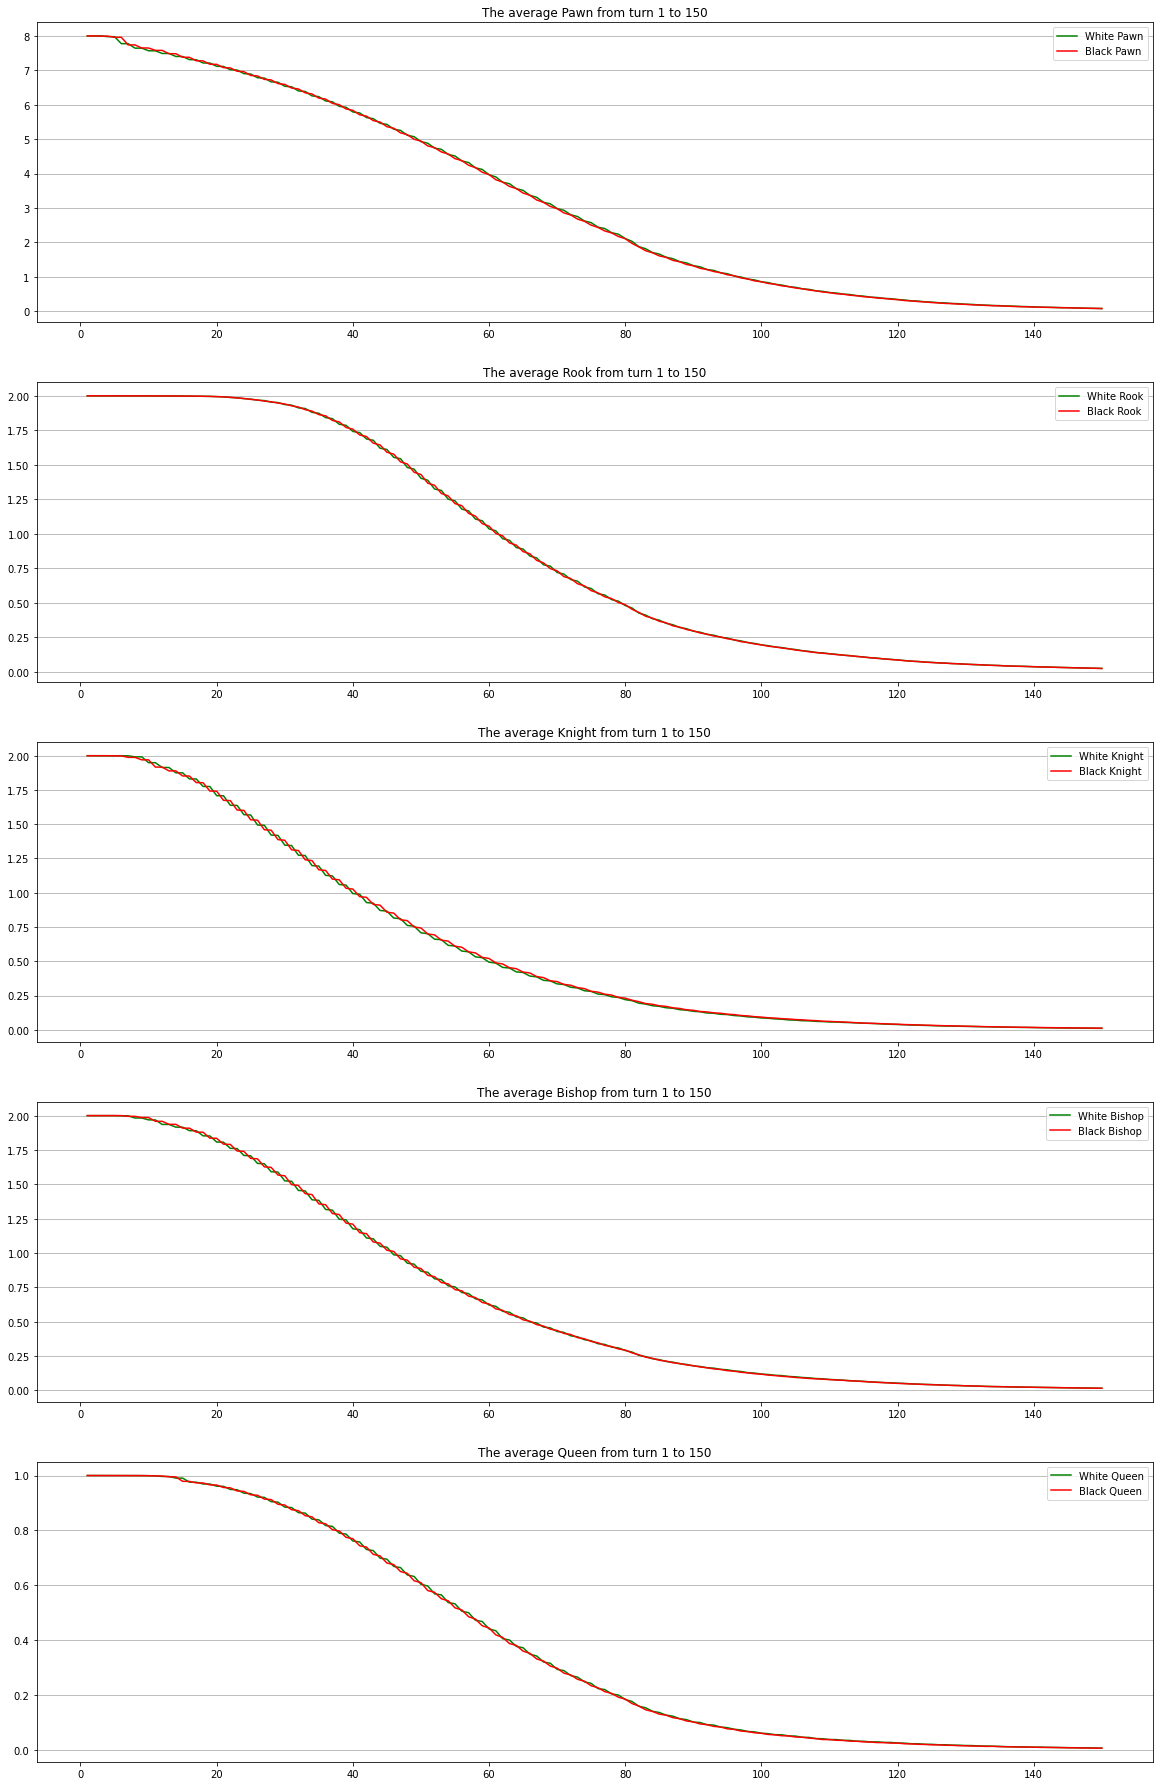

In [58]:
chess_pieces = ['P', 'R', 'N', 'B', 'Q', 
            'p', 'r', 'n', 'b', 'q']
titleOfPiece = {'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 'r': 'Rook', 'q': 'Queen', 'k': 'King'}

# Initialize figure and axis
fig, ax = plt.subplots(5, figsize=(20, 32))

'''
We only use 150 turns to visualize and do analysis because the number of
each chess piece nears zero value. So, it makes nonsense to visualize
this part of a game. Therefore, after turn 150 (or 75 in real life), 
the game seems in the end game.
'''
stop_point = 150

for i in range(0, 5):

  turn = piece_data['Turn'][0:stop_point]
  wp = piece_data[chess_pieces[i]][0:stop_point]
  bp = piece_data[chess_pieces[i + 5]][0:stop_point]  
  
  first_label = 'White ' + titleOfPiece[chess_pieces[i + 5]]
  second_label = 'Black ' + titleOfPiece[chess_pieces[i + 5]]

  # Plot lines
  ax[i].plot(turn, wp , color="green", label = first_label)
  ax[i].plot(turn, bp, color="red", label = second_label)

  ax[i].legend()
  ax[i].grid(axis='y')
  ax[i].set_title('The average ' +  titleOfPiece[chess_pieces[i + 5]] + ' from turn 1 to 150')

fig.patch.set_facecolor('white')
plt.savefig('piece-analysis1.png')
plt.show()

## Total chess piece odd between two player for each turn
Suppose that the value of each chess piece include pawn, knight, bishop, rook, queen is 1, 3, 3, 5, 9 respectively

In [60]:
# The odd between the white pieces and black piece
piece_data['Odd'] = piece_data['P'] + piece_data['N'] * 3 + piece_data['B'] * 3 + piece_data['R'] * 5 \
              + piece_data['Q'] * 9 - piece_data['p'] - piece_data['n'] * 3 - piece_data['b'] * 3 \
                - piece_data['r'] * 5 - piece_data['q'] * 9

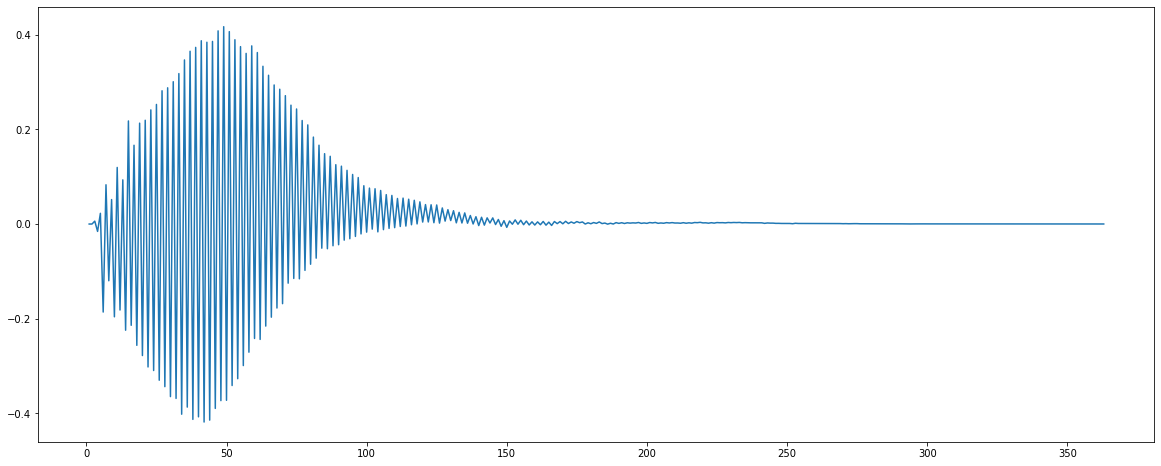

In [62]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot('Turn', 'Odd', data=piece_data)
plt.show()

In [8]:
piece_data['Abs Odd'] = piece_data['Odd'].abs()

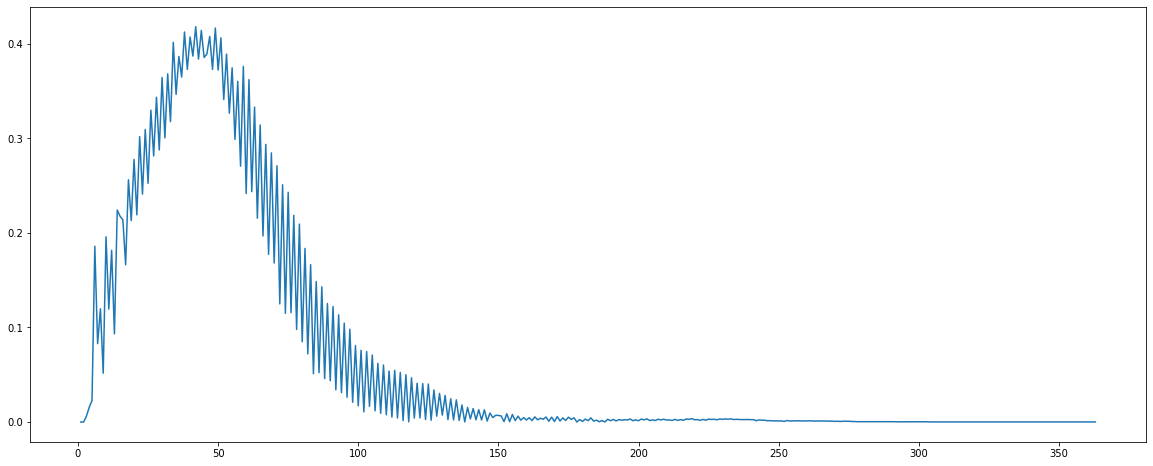

In [59]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot('Turn', 'Abs Odd', data=piece_data)
plt.show()

In [20]:
piece_data['Turn'][0:200]

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Turn, Length: 200, dtype: int64